<a href="https://colab.research.google.com/github/Shaas08/hello-world/blob/master/relu%20confusion%20matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -q kaggle

In [9]:
from google.colab import files
#upload the Kaggle API credentials JSON file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saswatbanerjee","key":"a4a2a62677649e93dd6238796527688a"}'}

In [10]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d andrewmvd/animal-faces

 99% 690M/696M [00:09<00:00, 90.0MB/s]
100% 696M/696M [00:09<00:00, 76.5MB/s]


In [12]:
!unzip animal-faces.zip -d animal-faces

Archive:  animal-faces.zip
replace animal-faces/afhq/train/cat/flickr_cat_000002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

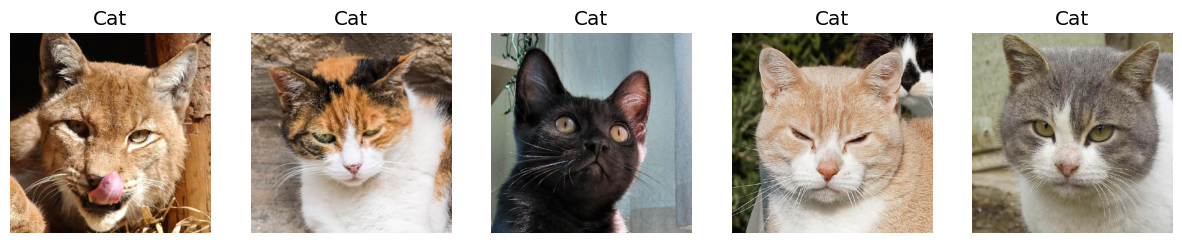

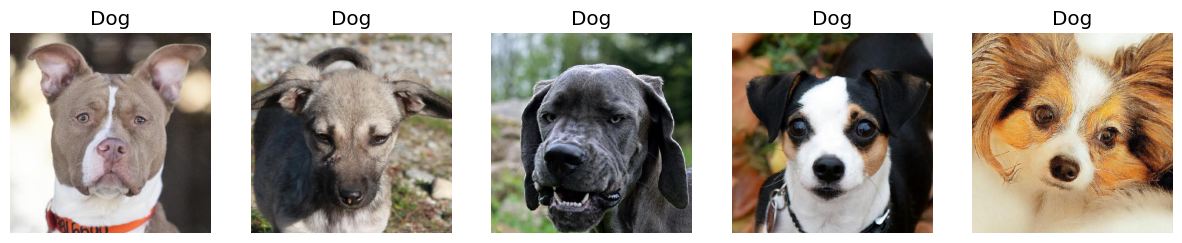

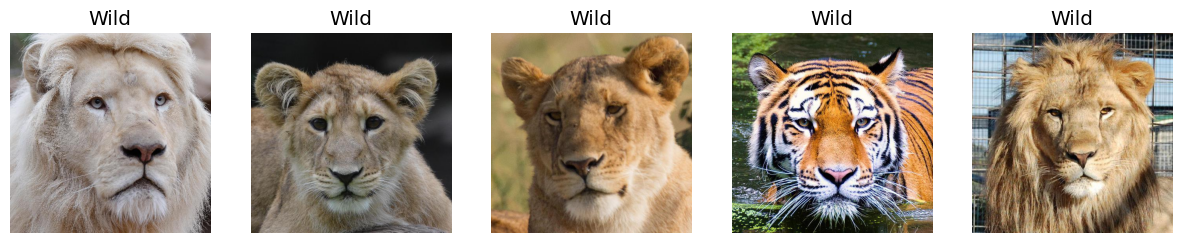

In [6]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import matplotlib.pylab as plt
plt.style.use('ggplot')
# Define paths to the new dataset
cat_files = glob('animal-faces/afhq/train/cat/*.jpg')
dog_files = glob('animal-faces/afhq/train/dog/*.jpg')
wild_files = glob('animal-faces/afhq/train/wild/*.jpg')

# Display some sample images
num_samples = 5

# Display sample cat images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    img = cv2.imread(cat_files[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_samples, i+1)
    plt.imshow(img)
    plt.title('Cat')
    plt.axis('off')
plt.show()

# Display sample dog images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    img = cv2.imread(dog_files[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_samples, i+1)
    plt.imshow(img)
    plt.title('Dog')
    plt.axis('off')
plt.show()
# Display sample wild animal images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    img = cv2.imread(wild_files[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_samples, i+1)
    plt.imshow(img)
    plt.title('Wild')
    plt.axis('off')
plt.show()

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                   

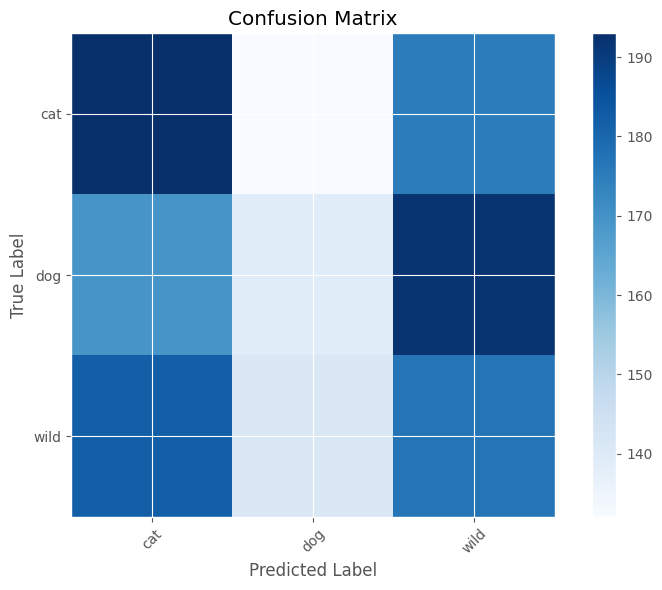

Results Discussion:
- The model achieved an accuracy of 0.7786666750907898 on the validation set.
- The classification report provides detailed metrics such as precision, recall, and F1-score for each class.
- The confusion matrix visualizes the model's performance, showing where it succeeds and where it struggles.
- Challenges encountered during model development may include overfitting, class imbalance, and tuning hyperparameters.


FileNotFoundError: [Errno 2] No such file or directory: 'animal-faces/afhq/val/cat/*.jpg'

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Define constants
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 32
NUM_EPOCHS = 1

# Define paths to dataset
train_data_dir = 'animal-faces/afhq/train'
validation_data_dir = 'animal-faces/afhq/val'

# Preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='sigmoid')  # Update with the actual number of classes
])

# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
evaluation = model.evaluate(validation_generator)
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])

# Get predictions
validation_generator.reset()
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = validation_generator.classes

# Calculate relevant evaluation metrics
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(validation_generator.class_indices))
plt.xticks(tick_marks, validation_generator.class_indices, rotation=45)
plt.yticks(tick_marks, validation_generator.class_indices)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Discuss the results and challenges
print("Results Discussion:")
print("- The model achieved an accuracy of", evaluation[1], "on the validation set.")
print("- The classification report provides detailed metrics such as precision, recall, and F1-score for each class.")
print("- The confusion matrix visualizes the model's performance, showing where it succeeds and where it struggles.")
print("- Challenges encountered during model development may include overfitting, class imbalance, and tuning hyperparameters.")

# Load and display an image using matplotlib
img_path = 'animal-faces/afhq/val/cat/*.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
img_arr = tf.keras.preprocessing.image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0) / 255.0

plt.figure(figsize=(8, 8))
plt.imshow(img_arr[0])
plt.axis('off')
plt.show()

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                     

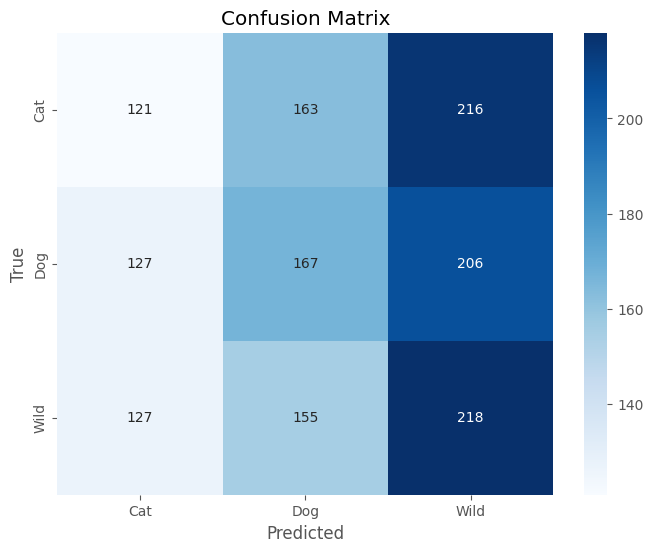

Results Discussion:
- The model achieved an accuracy of 0.7066666483879089 on the validation set.
- The classification report provides detailed metrics such as precision, recall, and F1-score for each class.
- The confusion matrix visualizes the model's performance, showing where it succeeds and where it struggles.
- Challenges encountered during model development may include overfitting, class imbalance, and tuning hyperparameters.


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Define constants
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 32
NUM_EPOCHS = 1

# Define paths to dataset
train_data_dir = 'animal-faces/afhq/train'
validation_data_dir = 'animal-faces/afhq/val'

# Preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')  # Update with the actual number of classes
])

# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
evaluation = model.evaluate(validation_generator)
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])

# Get predictions
validation_generator.reset()
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = validation_generator.classes

# Calculate relevant evaluation metrics
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['Cat', 'Dog', 'Wild']

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Discuss the results and challenges
print("Results Discussion:")
print("- The model achieved an accuracy of", evaluation[1], "on the validation set.")
print("- The classification report provides detailed metrics such as precision, recall, and F1-score for each class.")
print("- The confusion matrix visualizes the model's performance, showing where it succeeds and where it struggles.")
print("- Challenges encountered during model development may include overfitting, class imbalance, and tuning hyperparameters.")


In [ ]:
import numpy as np

def confusion_matrix(y_true, y_pred):
    """
    Computes and returns the confusion matrix.

    Args:
        y_true (np.ndarray): The ground-truth labels.
        y_pred (np.ndarray): The predicted labels.

    Returns:
        np.ndarray: The confusion matrix.
    """
    assert y_true.shape == y_pred.shape, (
        'y_true and y_pred must have the same shape.'
    )
    return np.stack([
        np.bincount(y_true[:, i], y_pred[:, i], minlength=len(np.unique(y_true)))
        for i in range(y_true.shape[1])
    ], axis=1)

# Create a 2x2 matrix
y_true = np.array([[0, 1], [1, 0]])
y_pred = np.array([[1, 0], [0, 1]])

# Compute the confusion matrix
confusion_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(confusion_matrix)